In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, ccf, grangercausalitytests
from statsmodels.tsa.api import VAR


locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
df = pd.read_csv('../data/df_analise.csv').set_index('Data')
df.index = pd.to_datetime(df.index, format='%b/%Y')
df = df.asfreq(pd.infer_freq(df.index))

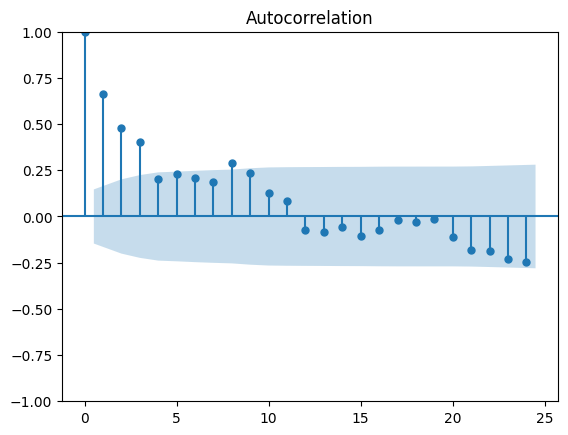

In [2]:
plot_acf(x=df['IGP10'], lags=24)
plt.show()

In [3]:
result_adfuller = adfuller(df['IGP10'], autolag='AIC')
print('Stationary: ' + str(result_adfuller[1] < 0.05))

Stationary: True


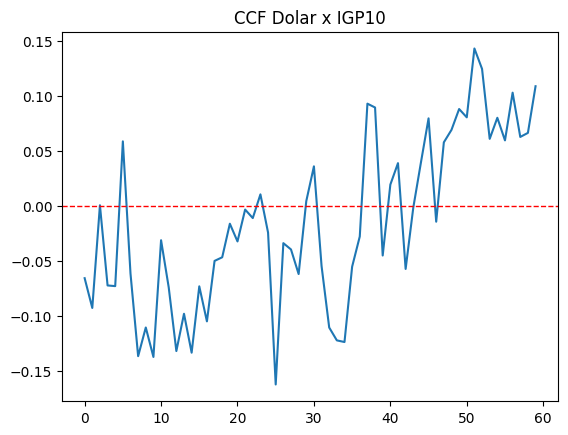

In [4]:
result_ccf = ccf(df['Dolar'], df['IGP10'], adjusted=True)[:60]
plt.plot(result_ccf, label='ccf')
plt.title('CCF Dolar x IGP10')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

In [5]:
model = VAR(df[['Dolar', 'IGP10']])
lag_order = model.select_order(maxlags=24)
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,2.920,2.959,18.54,2.936
1,2.361,2.479*,10.60,2.409*
2,2.375,2.572,10.75,2.455
3,2.410,2.685,11.13,2.521
4,2.397,2.750,10.99,2.540
5,2.317,2.749,10.15,2.492
6,2.310,2.820,10.08,2.517
7,2.321,2.910,10.20,2.560
8,2.276*,2.943,9.750*,2.547
9,2.321,3.067,10.21,2.624


In [6]:
result_var = model.fit(maxlags=8)
print(result_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           ter, 29, abr, 2025
Time:                     15:23:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.87099
Nobs:                     171.000    HQIC:                   2.49979
Log likelihood:          -643.338    FPE:                    9.46543
AIC:                      2.24633    Det(Omega_mle):         7.83099
--------------------------------------------------------------------
Results for equation Dolar
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            1.284709         0.504540            2.546           0.011
L1.Dolar        -0.040784         0.080247           -0.508           0.611
L1.IGP10        -0.605184         0.561918           -1.077           0.281
L2.D

In [13]:
cause = result_var.test_causality('IGP10', 'Dolar', kind='f')
cause.summary()

Test statistic,Critical value,p-value,df
3.068,1.969,0.002,"(8, 308)"


In [8]:
g = grangercausalitytests(x=df[['Dolar', 'IGP10']], maxlag=8)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6087  , p=0.2064  , df_denom=175, df_num=1
ssr based chi2 test:   chi2=1.6363  , p=0.2008  , df=1
likelihood ratio test: chi2=1.6288  , p=0.2019  , df=1
parameter F test:         F=1.6087  , p=0.2064  , df_denom=175, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3632  , p=0.2586  , df_denom=172, df_num=2
ssr based chi2 test:   chi2=2.8057  , p=0.2459  , df=2
likelihood ratio test: chi2=2.7837  , p=0.2486  , df=2
parameter F test:         F=1.3632  , p=0.2586  , df_denom=172, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3064  , p=0.2741  , df_denom=169, df_num=3
ssr based chi2 test:   chi2=4.0814  , p=0.2528  , df=3
likelihood ratio test: chi2=4.0348  , p=0.2577  , df=3
parameter F test:         F=1.3064  , p=0.2741  , df_denom=169, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0154  , p=0.4010  

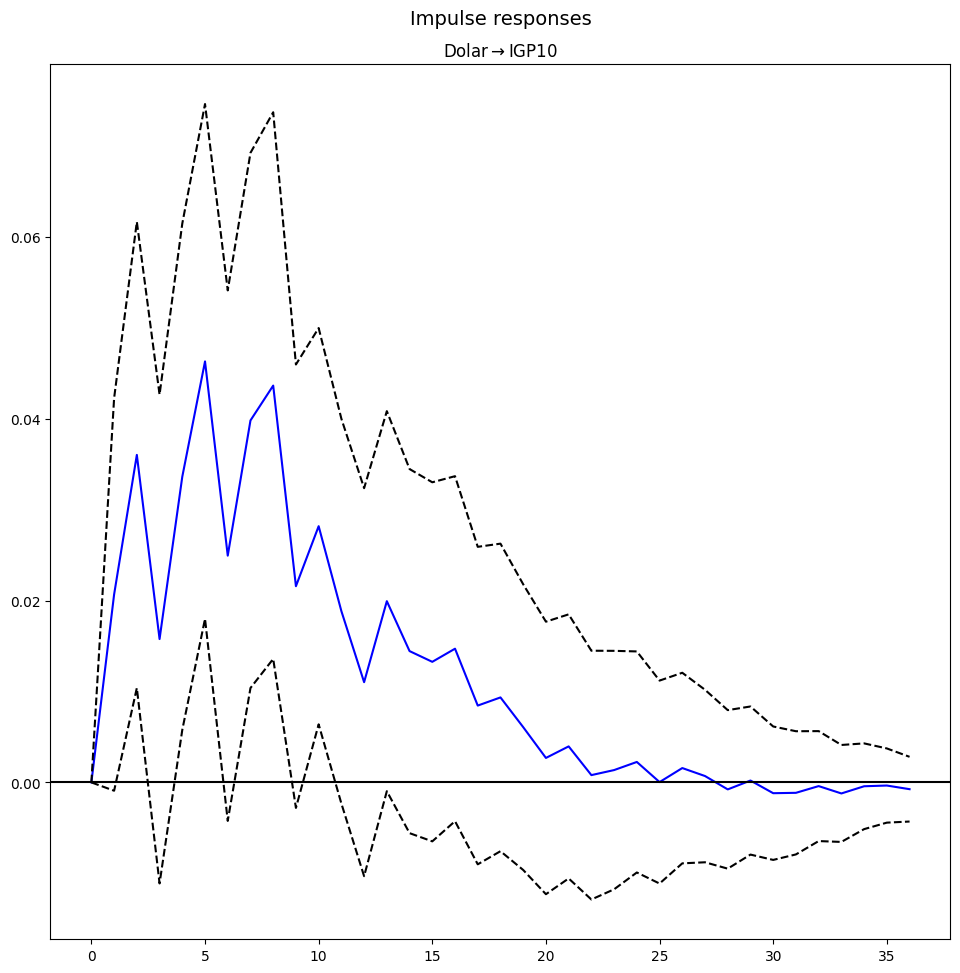

In [9]:
irf = result_var.irf(36)
irf.plot(impulse='Dolar', response='IGP10')
plt.show()

In [10]:
dolar_index = 0
x_index = 1

# Respostas de x a choques no Dólar
response_x_to_dolar = irf.orth_irfs [:, dolar_index, x_index]

for month, value in enumerate(response_x_to_dolar):
    print(f"Mês {month}: {value:.5f}")

Mês 0: 0.00000
Mês 1: -0.37518
Mês 2: 0.25285
Mês 3: -0.10000
Mês 4: -0.62568
Mês 5: 0.51292
Mês 6: 0.30617
Mês 7: -0.21142
Mês 8: -0.16068
Mês 9: -0.49786
Mês 10: -0.31527
Mês 11: 0.05165
Mês 12: -0.14811
Mês 13: -0.02218
Mês 14: -0.00521
Mês 15: -0.05696
Mês 16: 0.02764
Mês 17: -0.09549
Mês 18: -0.09130
Mês 19: -0.03913
Mês 20: -0.10232
Mês 21: -0.01426
Mês 22: -0.01208
Mês 23: -0.02408
Mês 24: 0.04920
Mês 25: -0.00284
Mês 26: -0.01091
Mês 27: 0.00854
Mês 28: -0.03485
Mês 29: -0.00480
Mês 30: -0.00032
Mês 31: -0.01467
Mês 32: 0.01756
Mês 33: 0.00568
Mês 34: 0.00519
Mês 35: 0.01552
Mês 36: -0.00495


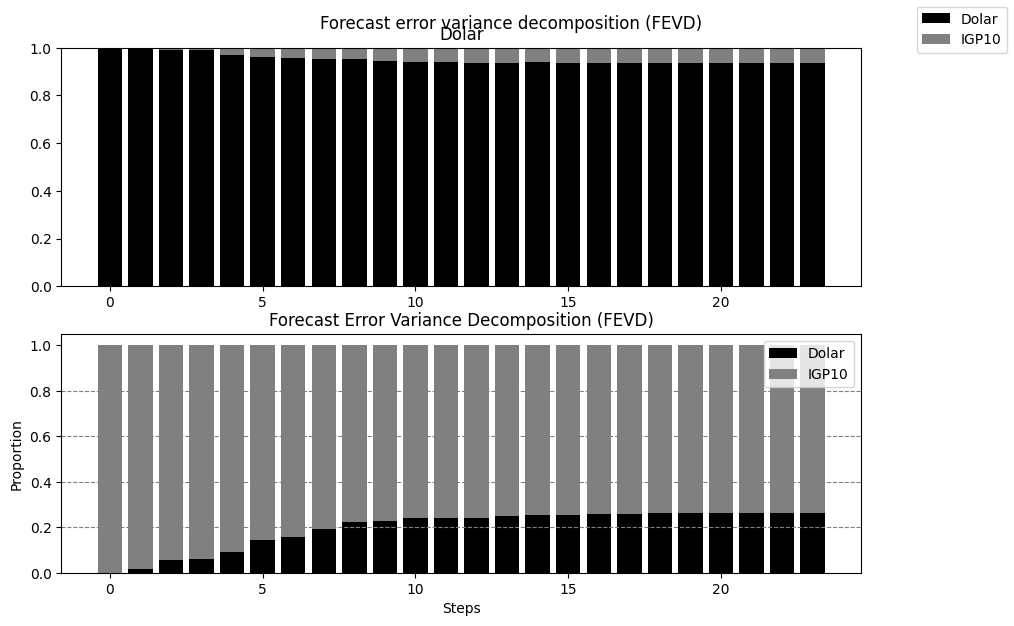

In [12]:
fevd = result_var.fevd(24)

# Plot the FEVD
fevd.plot(figsize=(10, 6))
plt.title("Forecast Error Variance Decomposition (FEVD)")
plt.xlabel("Steps")
plt.ylabel("Proportion")
plt.legend(loc='best')

for level in [0.2, 0.4, 0.6, 0.8]:
    plt.axhline(level, color='gray', linestyle='--', linewidth=0.8)

plt.show()